In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from reinforce import PolicyGradientAgent

In [2]:
def plot_learning_curve(scores, x):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

In [3]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    n_games = 3001
    agent = PolicyGradientAgent(gamma=0.99, lr=0.0005, input_dims=(env.observation_space.shape),
                                n_actions=env.action_space.n, fc1_dims=128, fc2_dims=128)

    scores = []
    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_rewards(reward)
            observation = observation_
        agent.learn()
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score)

episode  0 score 34.00 average score 34.00
episode  1 score 22.00 average score 28.00
episode  2 score 12.00 average score 22.67
episode  3 score 16.00 average score 21.00
episode  4 score 11.00 average score 19.00
episode  5 score 32.00 average score 21.17
episode  6 score 30.00 average score 22.43
episode  7 score 12.00 average score 21.12
episode  8 score 30.00 average score 22.11
episode  9 score 37.00 average score 23.60
episode  10 score 41.00 average score 25.18
episode  11 score 13.00 average score 24.17
episode  12 score 13.00 average score 23.31
episode  13 score 9.00 average score 22.29
episode  14 score 13.00 average score 21.67
episode  15 score 61.00 average score 24.12
episode  16 score 34.00 average score 24.71
episode  17 score 29.00 average score 24.94
episode  18 score 15.00 average score 24.42
episode  19 score 46.00 average score 25.50
episode  20 score 27.00 average score 25.57
episode  21 score 22.00 average score 25.41
episode  22 score 14.00 average score 24.91

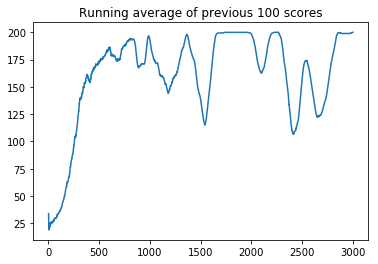

In [4]:
x = [i+1 for i in range(len(scores))]
plot_learning_curve(scores, x)